Day X - Retail AI Sprint (Suri Sons)
date - 22-12-2025

##Plan checklist
-[] KPIs +charts
-[] Reorder CSV
-[] FAQs + Style Bot
-[] Push to GitHub
-[] Linkedln update

In [3]:
print("hello greeva! starting the sprint.")

hello greeva! starting the sprint.


Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)

pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0


In [7]:
import pandas
print(pandas.file)

AttributeError: module 'pandas' has no attribute 'file'

total revenue (rs): 11000
total units: 8

Top items by qty:
item
top      3
Kurti    2
saree    1
shirt    1
suit     1
Name: qty, dtype: int64


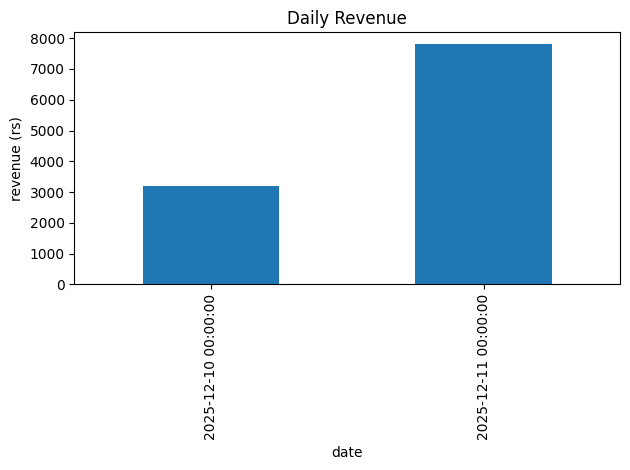

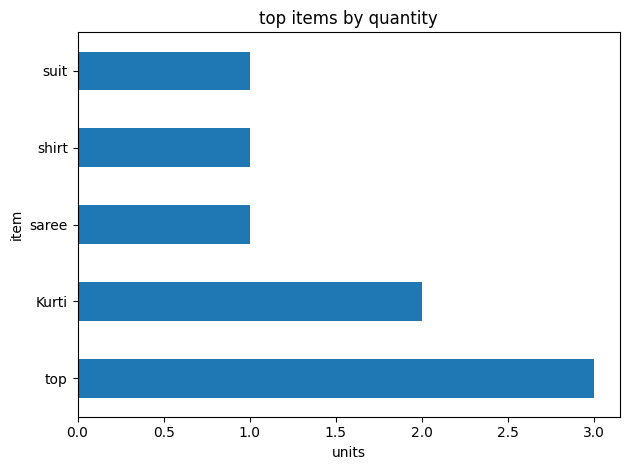

saved sample_sales.csv


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    {"date": "2025-12-10","item":"Kurti","cat":"ethenic","size":"M","qty":2,"price":1200},
    {"date": "2025-12-10","item":"shirt","cat":"casual","size":"L","qty":1,"price":800},
    {"date": "2025-12-11","item":"saree","cat":"ethenic","size":"Free","qty":1,"price":2500},
    {"date": "2025-12-11","item":"top","cat":"casual","size":"S","qty":3,"price":700},
    {"date": "2025-12-11","item":"suit","cat":"ethenic","size":"M","qty":1,"price":3200},
]
df = pd.DataFrame(data)

#clean &features
df["date"] = pd.to_datetime(df["date"])
df["revenue"] = df["qty"] * df["price"]

#KPIs
total_rev = int(df["revenue"].sum())
total_units = int(df["qty"].sum())
print("total revenue (rs):" , total_rev)
print("total units:", total_units)

#top items
print("\nTop items by qty:")
print(df.groupby("item") ["qty"].sum().sort_values(ascending = False))

#revenue by category
daily_rev = df.groupby("date")["revenue"].sum()
daily_rev.plot(kind = "bar", title = "Daily Revenue")
plt.xlabel("date"); plt.ylabel("revenue (rs)")
plt.tight_layout(); plt.show()

top_items = df.groupby("item")["qty"].sum().sort_values(ascending=False).head(5)
top_items.plot(kind="barh", title = "top items by quantity")
plt.xlabel("units"); plt.tight_layout(); plt.show()

#export
df.to_csv("samples_sales.csv", index=False)
print("saved sample_sales.csv")

#assertion

In [15]:
assert df["qty"].sum()>0
assert {"item", "qty", "price", "revenue"}.issubset(df.columns)

# sales grouped by item and date


In [16]:
daily_item = df.groupby(["item", "date"]) ["qty"].sum().reset_index()

In [18]:
rows = []
window = 3 #moving average window (days)
for item, g in daily_item.groupby("item"):
  g = g.sort_values("date").set_index("date")

#fill missing dates

In [19]:
idx = pd.date_range(g.index.min(), g.index.max(), freq = "D")
g = g.reindex(idx).fillna(0)

#compute moving average

In [20]:
g["ma"] = g["qty"].rolling(window).mean()

#taking last moving average as suggestion

In [21]:
suggestion = int(np.ceil(g["ma"].iloc[-1])) if not g["ma"].isna().all() else 0

#store result

In [22]:
rows.append({"item": item, "suggested_reorder": suggestion})

#final data frame

In [24]:
reorder = pd.DataFrame(rows).sort_values("suggested_reorder", ascending=False)

#EXPORT+ASSERT

In [25]:
reorder.to_csv("reorder_suggestions.csv", index=False)
print("Saved reorder_suggestions.csv")

assert (reorder["suggested_reorder"]>=0).all()
assert "item" in reorder.columns

Saved reorder_suggestions.csv


In [27]:
# Reorder Algorithm (Moving Average) (window 3)

import numpy as np
import pandas as pd

daily_item = df.groupby(["item", "date"]) ["qty"].sum().reset_index()
rows = []
window = 3 #moving average window (days)
for item, g in daily_item.groupby("item"):
  g = g.sort_values("date").set_index("date")

idx = pd.date_range(g.index.min(), g.index.max(), freq = "D")
g = g.reindex(idx).fillna(0)
g.index.name = "date"

g["ma"] = g["qty"].rolling(window).mean()

if g["ma"].isna().all():
  suggestion = 0
else:
  suggestion = int(np.ceil(g["ma"].iloc[-1]))
  if suggestion < 0:
    suggestion  = 0

rows.append({"item": item, "suggested_reorder": suggestion})

reorder = pd.DataFrame(rows).sort_values("suggested_reorder", ascending=False).reset_index(drop=True)

if "cat" in df.columns:
  cat_map = df.groupby("item")["cat"].agg(lambda s: s.tail(1).iloc[0])
  reorder["category"] = reorder["item"].map(cat_map)

print("reorder suggestions (window =", window, "days):")

display(reorder)

reorder.to_csv("reorder_suggestions.csv", index=False)
print("Saved reorder_suggestions.csv")

assert (reorder["suggested_reorder"]>=0).all()
assert "item" in reorder.columns

reorder suggestions (window = 3 days):


,item,suggested_reorder,category
0,top,0,casual


Saved reorder_suggestions.csv


In [28]:
# Reorder Algorithm (Moving Average) (window 7)

import numpy as np
import pandas as pd

daily_item = df.groupby(["item", "date"]) ["qty"].sum().reset_index()
rows = []
window = 7 #moving average window (days)
for item, g in daily_item.groupby("item"):
  g = g.sort_values("date").set_index("date")

idx = pd.date_range(g.index.min(), g.index.max(), freq = "D")
g = g.reindex(idx).fillna(0)
g.index.name = "date"

g["ma"] = g["qty"].rolling(window).mean()

if g["ma"].isna().all():
  suggestion = 0
else:
  suggestion = int(np.ceil(g["ma"].iloc[-1]))
  if suggestion < 0:
    suggestion  = 0

rows.append({"item": item, "suggested_reorder": suggestion})

reorder = pd.DataFrame(rows).sort_values("suggested_reorder", ascending=False).reset_index(drop=True)

if "cat" in df.columns:
  cat_map = df.groupby("item")["cat"].agg(lambda s: s.tail(1).iloc[0])
  reorder["category"] = reorder["item"].map(cat_map)

print("reorder suggestions (window =", window, "days):")

display(reorder)

reorder.to_csv("reorder_suggestions.csv", index=False)
print("Saved reorder_suggestions.csv")

assert (reorder["suggested_reorder"]>=0).all()
assert "item" in reorder.columns

reorder suggestions (window = 7 days):


,item,suggested_reorder,category
0,top,0,casual


Saved reorder_suggestions.csv


In [31]:
# merge current stock to compute final order quantity

stock= pd.DataFrame([
    {"item": "Kurti", "current_stock": 5},
    {"item": "Shirt", "current_stock": 2}
])
final = reorder.merge(stock, on="item", how="left").fillna({"current_stock": 0})
final["final_order_qty"] = (final["suggested_reorder"] - final["current_stock"]).clip(lower=0).astype(int)
final

,item,suggested_reorder,category,current_stock,final_order_qty
0,top,0,casual,0.0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')